In [1]:
###########import packages##########
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from keras import regularizers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.constraints import max_norm
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.models import Model
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sko.PSO import PSO
import time
from keras.models import Model, load_model
from sko.GA import GA
from sko.DE import DE
from sklearn import tree
from sklearn.metrics import r2_score
import pickle
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
###########fix random seed for reproducability##########

database=pd.read_csv('finaldatabase.csv')
seed=1
np.random.seed(seed)
###########wrapping root mean square error for later calls##########
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
###########loading data##########
#fdata=pd.read_csv('database.csv',encoding="utf-8")
raw_data=database.loc[:,[                     
    'xN2a_in0',#0
    'RH_CC',#1
    'dela_CH (mm)',#2
    'dela_M (um)',#3
    'dela_GDL (um)',#4
    'p_A (atm)',#5
    'T_cc (K)',#6
    'E cell (V)',#7
    'current',#8
    'fyN2',#9
    
                    
                        ]]
###########data standardization##########
standardized_data = (raw_data-np.mean(raw_data,axis=0))/np.std(raw_data,axis=0)

###########defining a wrapper function for later call from each machine learning algorithms##########
raw_input=standardized_data.iloc[:,0:8]
raw_output=standardized_data.iloc[:,8:]
X=raw_input.values.astype(np.float32)
y=raw_output.values.astype(np.float32)
###########fix random seed for reproducability##########
seed=1
###########train test splitting##########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15,random_state=seed)
raw_input_global=raw_data.iloc[:,0:8]
raw_output_global=raw_data.iloc[:,8:]
###########wrap up fuction for later call for OPTIMIZATION##########
def evaluate(pre_2,real_2):
    pre_2=np.array(pre_2)
    real_2=np.array(real_2)
    pre_2_series=pd.Series(pre_2)
    real_2_series=pd.Series(real_2)
    return rmse(pre_2,real_2), round(pre_2_series.corr(real_2_series), 3)
def compare(list_name,limit):
    judge=1
    for a in list_name:
        if a < limit:
            judge=judge*1
        else:
            judge=judge*0
    return judge
def generate_arrays_from_file(path):
    while True:
        with open(path) as f:
            for line in f:
                # create numpy arrays of input data
                # and labels, from each line in the file
                x1, x2, y = process_line(line)
                yield ({'input_1': x1, 'input_2': x2}, {'output': y})
neurons1=500
regularizer=keras.regularizers.l2(0)
dropout_rate=0
epochs_number=1000
learning_rate_search=0.000005
batch_size_number=32
activation1='relu'



In [3]:
model=keras.models.load_model('ann.h5')

scatter current_corr  0.99999 scatter current_rmse  0.0021489749869756584 scatter current_r2  0.99998


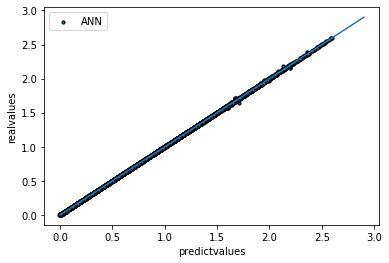

scatter crossover_rate_corr  0.99928 scatter crossover_rate_rmse  4.440832534431044e-17 scatter crossover_rate_r2  0.99856


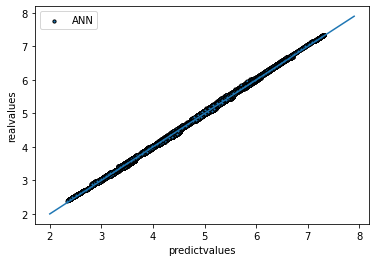

In [4]:

result=model.predict(X)
lpredictvalues=np.std(raw_output_global,axis=0).T.values*result+np.mean(raw_output_global,axis=0).T.values
lrealvalues=np.std(raw_output_global,axis=0).T.values*y+np.mean(raw_output_global,axis=0).T.values
spredictvalues_power=pd.Series(lpredictvalues[:,0])
srealvalues_power=pd.Series(lrealvalues[:,0])
current_corr=round(spredictvalues_power.corr(srealvalues_power), 5)
current_rmse=rmse(lpredictvalues[:,0],lrealvalues[:,0])
current_r2 = round(r2_score(lpredictvalues[:,0],lrealvalues[:,0]), 5)
print('scatter current_corr ',current_corr,'scatter current_rmse ',current_rmse,'scatter current_r2 ',current_r2)
x_y_x=np.arange(0,3,0.1)
x_y_y=np.arange(0,3,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lpredictvalues[:,0],lrealvalues[:,0],edgecolor='black',s=10,label='ANN')
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predictvalues")
plt.ylabel(u"realvalues")
plt.show()

spredictvalues_velocity=pd.Series(lpredictvalues[:,1])
srealvalues_velocity=pd.Series(lrealvalues[:,1])
crossover_rate_corr=round(spredictvalues_velocity.corr(srealvalues_velocity), 5)
crossover_rate_rmse=rmse(lpredictvalues[:,1],lrealvalues[:,1])
crossover_rate_r2 = round(r2_score(lpredictvalues[:,1],lrealvalues[:,1]), 5)
print('scatter crossover_rate_corr ',crossover_rate_corr,'scatter crossover_rate_rmse ',crossover_rate_rmse,'scatter crossover_rate_r2 ',crossover_rate_r2)
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lpredictvalues[:,1]*1e15,lrealvalues[:,1]*1e15,edgecolor='black',s=10,label='ANN')
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predictvalues")
plt.ylabel(u"realvalues")
plt.show()

In [5]:
#################### only crossover coefficient optimization ####################

In [6]:
## crossover coefficient;  optmization func defining
def funcc(X):
    a2,a3,a4,a5,a6,a7=X
    raw_median=raw_data.median()
    X=raw_median[0:8]    
    X.iloc[0]=xN2a_in0
    X.iloc[1]=a2
    X.iloc[2]=a3
    X.iloc[3]=a4
    X.iloc[4]=a5
    X.iloc[5]=a6
    X.iloc[6]=a7
    X.iloc[7]=E_cell
    standardized_X=(X-np.mean(raw_data,axis=0)[0:8])/np.std(raw_data,axis=0)[0:8]
    standardized_X=pd.DataFrame(standardized_X).T.values.astype(np.float32)
    predict_ann=model.predict(standardized_X)
    ###########result output##########
   # predict_ann=predict_ann*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    return predict_ann[0][1]


## with Ecell

def funcc_e(X):
    ff=[0.02,0.05,0.13,0.3,0.3,0.13,0.05,0.02]
    re=0
    for i in range(8):
        global E_cell
        E_cell=0.9-0.1*i
        re=funcc(X)*ff[i]+re
    return re

def antifunci(X):
    a2,a3,a4,a5,a6,a7=X
    raw_median=raw_data.median()
    X=raw_median[0:8]    
    X.iloc[0]=xN2a_in0
    X.iloc[1]=a2
    X.iloc[2]=a3
    X.iloc[3]=a4
    X.iloc[4]=a5
    X.iloc[5]=a6
    X.iloc[6]=a7
    X.iloc[7]=E_cell
    standardized_X=(X-np.mean(raw_data,axis=0)[0:8])/np.std(raw_data,axis=0)[0:8]
    standardized_X=pd.DataFrame(standardized_X).T.values.astype(np.float32)
    predict_ann=model.predict(standardized_X)
    ###########result output##########
   # predict_ann=predict_ann*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    return predict_ann[0][0]

def funci(X):
    a2,a3,a4,a5,a6,a7=X
    raw_median=raw_data.median()
    X=raw_median[0:8]    
    X.iloc[0]=xN2a_in0
    X.iloc[1]=a2
    X.iloc[2]=a3
    X.iloc[3]=a4
    X.iloc[4]=a5
    X.iloc[5]=a6
    X.iloc[6]=a7
    X.iloc[7]=E_cell
    standardized_X=(X-np.mean(raw_data,axis=0)[0:8])/np.std(raw_data,axis=0)[0:8]
    standardized_X=pd.DataFrame(standardized_X).T.values.astype(np.float32)
    predict_ann=model.predict(standardized_X)
    ###########result output##########
   # predict_ann=predict_ann*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    return -predict_ann[0][0]


In [7]:
## crossover coefficient;  anti-optmization func defining
def antifuncc(X):
    a2,a3,a4,a5,a6,a7=X
    raw_median=raw_data.median()
    X=raw_median[0:8]    
    X.iloc[0]=xN2a_in0
    X.iloc[1]=a2
    X.iloc[2]=a3
    X.iloc[3]=a4
    X.iloc[4]=a5
    X.iloc[5]=a6
    X.iloc[6]=a7
    X.iloc[7]=E_cell
    standardized_X=(X-np.mean(raw_data,axis=0)[0:8])/np.std(raw_data,axis=0)[0:8]
    standardized_X=pd.DataFrame(standardized_X).T.values.astype(np.float32)
    predict_ann=model.predict(standardized_X)
    ###########result output##########
   # predict_ann=predict_ann*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    return -predict_ann[0][1]


## with Ecell

def antifuncc_e(X):
    ff=[0.02,0.05,0.13,0.3,0.3,0.13,0.05,0.02]
    re=0
    for i in range(8):
        global E_cell
        E_cell=0.9-0.1*i
        re=funcc(X)*ff[i]+re
    return -re

def func(X):
    a2,a3,a4,a5,a6,a7=X
    raw_median=raw_data.median()
    X=raw_median[0:8]    
    X.iloc[0]=xN2a_in0
    X.iloc[1]=a2
    X.iloc[2]=a3
    X.iloc[3]=a4
    X.iloc[4]=a5
    X.iloc[5]=a6
    X.iloc[6]=a7
    X.iloc[7]=E_cell
    standardized_X=(X-np.mean(raw_data,axis=0)[0:8])/np.std(raw_data,axis=0)[0:8]
    standardized_X=pd.DataFrame(standardized_X).T.values.astype(np.float32)
    predict_ann=model.predict(standardized_X)
    ###########result output##########
   # predict_ann=predict_ann*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    return predict_ann[0]
def func_e(X):
    ff=[0.02,0.05,0.13,0.3,0.3,0.13,0.05,0.02]
    re=0
    for i in range(8):
        global E_cell
        E_cell=0.9-0.1*i
        re=func(X)*ff[i]+re
    return re

In [8]:
## reference standard (rs)
E_cell=0.5
xN2a_in0=0
print ('referece condition:')
print ('cell voltage:',E_cell)
print ('N2 accumulation:',xN2a_in0)


## worst crossover coefficient
iter_num=50
popu=50
antipso = PSO(func=antifuncc, dim=6, pop=popu, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
antipso.record_mode = True
b= antipso.run()
np.set_printoptions(formatter={'float':'{:.2f}'.format})
print('worst_x=', b.gbest_x)
print('worst_fitness={:.2f}'.format(-b.gbest_y))
worst_y=func(b.gbest_x)
worst_y=worst_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('worst crossover coefficient={:.2e}'.format(worst_y[1]))
worstc=worst_y[1]
print('\n')

## best crossver coefficient
pso = PSO(func=funcc, dim=6, pop=popu, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
a= pso.run()
np.set_printoptions(formatter={'float':'{:.2f}'.format})
print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(-a.gbest_y))
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
bestc=best_y[1]
print('\n')

## worst current density
antipso = PSO(func=antifunci, dim=6, pop=popu, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
antipso.record_mode = True
b= antipso.run()
np.set_printoptions(formatter={'float':'{:.2f}'.format})
print('worst_x=', b.gbest_x)
print('worst_fitness={:.2f}'.format(-b.gbest_y))
worst_y=func(b.gbest_x)
worst_y=worst_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('worst current density={:.2f}'.format(worst_y[0]))
worsti=worst_y[0]
print('\n')

## best current density
pso = PSO(func=funci, dim=6, pop=popu, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
a= pso.run()
np.set_printoptions(formatter={'float':'{:.2f}'.format})
print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(-a.gbest_y))
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best current density={:.2f}'.format(best_y[0]))
besti=best_y[0]

midi=(besti+worsti)/2
midc=(bestc+worstc)/2


referece condition:
cell voltage: 0.5
N2 accumulation: 0
worst_x= [1.00 1.44 500.00 348.92 1.00 358.00]
worst_fitness=2.22
worst crossover coefficient=7.25e-15


best_x= [0.00 3.00 10.00 100.00 6.00 323.00]
best_fitness=2.02
best crossover coefficient=2.30e-15


worst_x= [0.83 3.00 500.00 500.00 6.00 323.00]
worst_fitness=1.28
worst current density=0.03


best_x= [0.99 1.73 10.00 100.00 5.54 358.00]
best_fitness=3.04
best current density=2.30


In [9]:
def evacuate(best_x):
    E_cell=0.5
    best_y=func(best_x)
    best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    copt_best=(best_y[1]-bestc)/bestc
    copt_mid=(best_y[1]-midc)/midc
    copt_worst=(best_y[1]-worstc)/worstc
    iopt_best=(best_y[0]-besti)/besti
    iopt_mid=(best_y[0]-midi)/midi
    iopt_worst=(best_y[0]-worsti)/worsti
    print('compared with the worst crossover coefficient {:.2e} and worst current density {:.3f} in E_cell=0.5 ,we decrease the crossover by {:.3f}, and improve the current density {:.3f} \n'.format(worstc,worsti,-copt_worst,iopt_worst))
    print('compared with the middle crossover coefficient {:.2e} and mid current density {:.3f} in E_cell=0.5 ,we decrease the crossover by {:.3f}, and improve the current density {:.3f} \n'.format(midc,midi,-copt_mid,iopt_mid))
    print('compared with the best crossover coefficient {:.2e} and best current density {:.3f} in E_cell=0.5 ,the crossover coefficient increased by {:.3f}, and the current density decreased by {:.3f} \n'.format(bestc,besti,copt_best,-iopt_best))    
    

precondition : 
E_cell=0.90 
N2 accumulation= 0 

best_x= [0.81 1.79 500.00 500.00 2.60 323.00]
best_fitness=-1.04
best crossover coefficient=3.21e-15
best  current density=0.21
Time cost of grid search= 158.384047s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.558, and improve the current density 9.879 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.328, and improve the current density -0.822 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.397, and the current density decreased by 0.910 

bestfitness plot


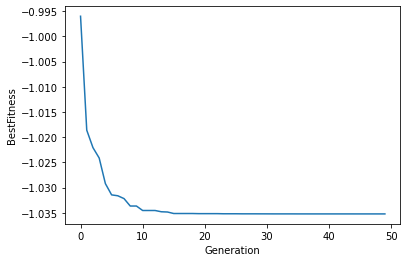

precondition : 
E_cell=0.80 
N2 accumulation= 0 

best_x= [0.07 1.00 500.00 254.33 2.73 323.00]
best_fitness=-1.05
best crossover coefficient=3.11e-15
best  current density=0.18
Time cost of grid search= 157.421777s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.572, and improve the current density 8.300 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.350, and improve the current density -0.848 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.353, and the current density decreased by 0.923 

bestfitness plot


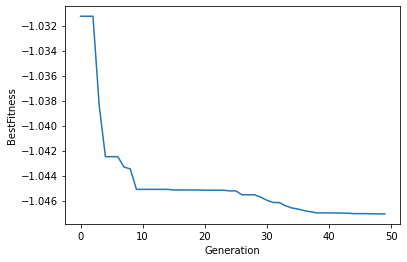

precondition : 
E_cell=0.70 
N2 accumulation= 0 

best_x= [0.77 0.50 10.00 100.00 6.00 323.00]
best_fitness=-1.43
best crossover coefficient=2.34e-15
best  current density=1.27
Time cost of grid search= 157.282050s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.678, and improve the current density 66.202 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.510, and improve the current density 0.097 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.019, and the current density decreased by 0.447 

bestfitness plot


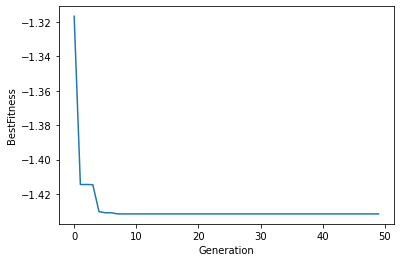

precondition : 
E_cell=0.60 
N2 accumulation= 0 

best_x= [0.90 3.00 10.00 100.00 6.00 323.00]
best_fitness=-1.80
best crossover coefficient=2.31e-15
best  current density=1.26
Time cost of grid search= 156.967896s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.682, and improve the current density 65.319 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.517, and improve the current density 0.082 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.004, and the current density decreased by 0.454 

bestfitness plot


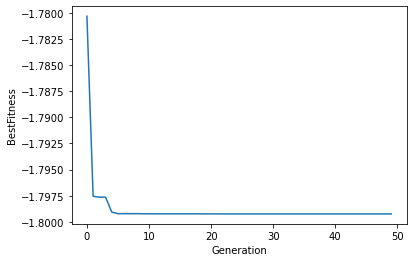

precondition : 
E_cell=0.50 
N2 accumulation= 0 

best_x= [0.00 3.00 10.00 100.00 6.00 323.00]
best_fitness=-2.02
best crossover coefficient=2.30e-15
best  current density=1.23
Time cost of grid search= 156.978409s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.684, and improve the current density 63.885 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.519, and improve the current density 0.059 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.000, and the current density decreased by 0.466 

bestfitness plot


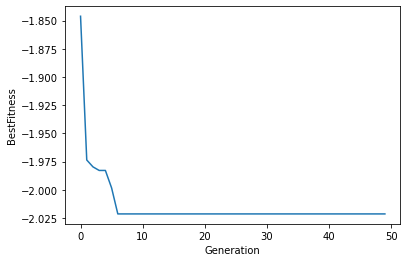

precondition : 
E_cell=0.40 
N2 accumulation= 0 

best_x= [0.00 3.00 10.00 100.00 6.00 323.00]
best_fitness=-2.18
best crossover coefficient=2.30e-15
best  current density=1.23
Time cost of grid search= 156.950021s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.684, and improve the current density 63.885 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.519, and improve the current density 0.059 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.000, and the current density decreased by 0.466 

bestfitness plot


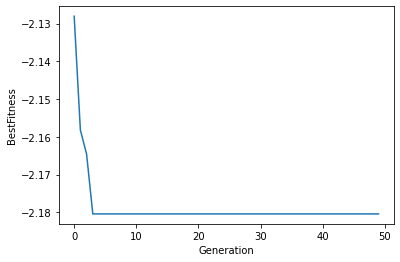

precondition : 
E_cell=0.30 
N2 accumulation= 0 

best_x= [1.00 3.00 10.00 500.00 6.00 323.00]
best_fitness=-2.26
best crossover coefficient=2.36e-15
best  current density=0.95
Time cost of grid search= 156.827219s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.675, and improve the current density 49.098 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.506, and improve the current density -0.182 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.029, and the current density decreased by 0.588 

bestfitness plot


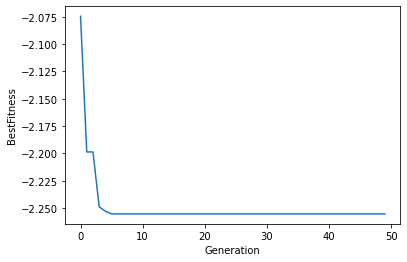

precondition : 
E_cell=0.20 
N2 accumulation= 0 

best_x= [0.05 3.00 10.00 100.00 6.00 323.00]
best_fitness=-2.39
best crossover coefficient=2.30e-15
best  current density=1.23
Time cost of grid search= 156.389510s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.683, and improve the current density 63.886 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.518, and improve the current density 0.059 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.002, and the current density decreased by 0.466 

bestfitness plot


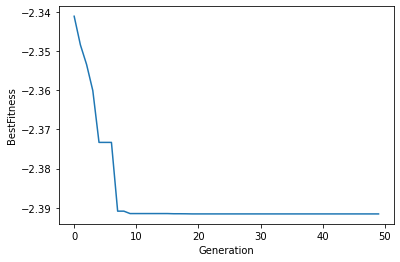

In [210]:
## only crossover coefficient optimization in all cell voltage.
for i in range(8):

    xN2a_in0=0
    iter_num = 50
    E_cell=0.9-0.1*i
    print('precondition : ')
    print('E_cell={:.2f}'.format(E_cell),'\nN2 accumulation=',xN2a_in0,'\n')

    ##optimization
    pso = PSO(func=funcc, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
          ,w=0.8, c1=0.5, c2=0.5)
    pso.record_mode = True
    time_start = time.time()
    a= pso.run()

    print('best_x=', a.gbest_x)
    print('best_fitness={:.2f}'.format(a.gbest_y))
    E_cell=0.5
    best_y=func(a.gbest_x)
    best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    print('best crossover coefficient={:.2e}'.format(best_y[1]))
    print('best  current density={:.2f}'.format(best_y[0]))
    time_end = time.time()
    print('Time cost of grid search= %fs' % (time_end - time_start),'\n')

    evacuate(a.gbest_x)

    # visualization 
    print('bestfitness plot')
    plt.plot(pso.gbest_y_hist)
    plt.xlabel('Generation')
    plt.ylabel('BestFitness')
    plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
    plt.show()




precondition : 
N2 accumulation= 0 

best_x= [0.00 3.00 10.00 100.00 6.00 323.00]
best_fitness=-1.84
best crossover coefficient=2.30e-15
best  current density=1.23
Time cost of grid search= 50.337089s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.684, and improve the current density 63.885 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.519, and improve the current density 0.059 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.000, and the current density decreased by 0.466 

bestfitness plot


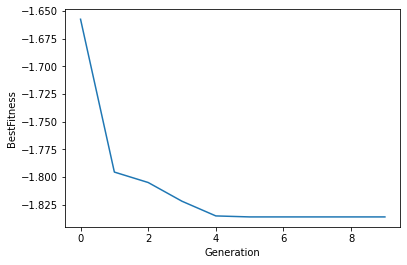

In [211]:
##weighted crossover coefficient optmization 

xN2a_in0=0
iter_num = 10
E_cell=0.5
print('precondition : ')
print('N2 accumulation=',xN2a_in0,'\n')

##optimization
pso = PSO(func=funcc_e, dim=6, pop=10, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
time_start = time.time()
a= pso.run()

print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(a.gbest_y))
E_cell=0.5
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
print('best  current density={:.2f}'.format(best_y[0]))
time_end = time.time()
print('Time cost of grid search= %fs' % (time_end - time_start),'\n')

evacuate(a.gbest_x)

# visualization 
print('bestfitness plot')
plt.plot(pso.gbest_y_hist)
plt.xlabel('Generation')
plt.ylabel('BestFitness')
plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
plt.show()


In [212]:
################# only current density optimizaiton ###########################

In [10]:
## current density optmization func defining

# in all cell voltage

#weighted all cell voltage
def funci_e(X):
    ff=[0.02,0.05,0.13,0.3,0.3,0.13,0.05,0.02]
    re=0
    for i in range(8):
        global E_cell
        E_cell=0.9-0.1*i
        re=funci(X)*ff[i]+re
    return re

In [11]:
## current density antioptmization func defining

# in all cell voltage
def antifunci(X):
    a2,a3,a4,a5,a6,a7=X
    raw_median=raw_data.median()
    X=raw_median[0:8]    
    X.iloc[0]=xN2a_in0
    X.iloc[1]=a2
    X.iloc[2]=a3
    X.iloc[3]=a4
    X.iloc[4]=a5
    X.iloc[5]=a6
    X.iloc[6]=a7
    X.iloc[7]=E_cell
    standardized_X=(X-np.mean(raw_data,axis=0)[0:8])/np.std(raw_data,axis=0)[0:8]
    standardized_X=pd.DataFrame(standardized_X).T.values.astype(np.float32)
    predict_ann=model.predict(standardized_X)
    ###########result output##########
   # predict_ann=predict_ann*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    return predict_ann[0][0]

#weighted all cell voltage
def antifunci_e(X):
    ff=[0.02,0.05,0.13,0.3,0.3,0.13,0.05,0.02]
    re=0
    for i in range(8):
        global E_cell
        E_cell=0.9-0.1*i
        re=funci(X)*ff[i]+re
    return -re

precondition : 
E_cell=0.90 
N2 accumulation= 0 

best_x= [0.00 0.51 10.00 100.00 6.00 358.00]
best_fitness=0.99
best crossover coefficient=5.56e-15
best  current density=2.12
Time cost of grid search= 155.998416s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.234, and improve the current density 111.133 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.163, and improve the current density 0.830 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.420, and the current density decreased by 0.077 

bestfitness plot


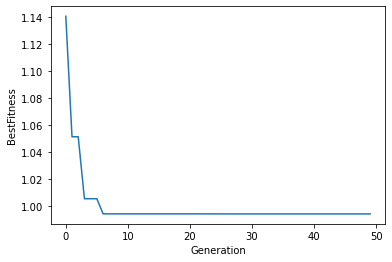

precondition : 
E_cell=0.80 
N2 accumulation= 0 

best_x= [0.11 0.57 10.00 100.00 6.00 358.00]
best_fitness=0.14
best crossover coefficient=5.58e-15
best  current density=2.16
Time cost of grid search= 156.159063s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.233, and improve the current density 112.879 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.166, and improve the current density 0.859 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.425, and the current density decreased by 0.063 

bestfitness plot


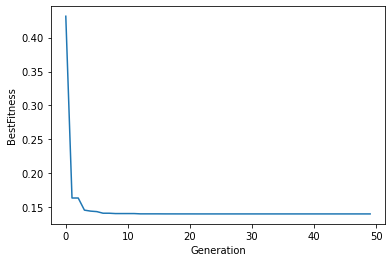

precondition : 
E_cell=0.70 
N2 accumulation= 0 

best_x= [0.83 1.60 10.00 100.00 6.00 358.00]
best_fitness=-1.20
best crossover coefficient=5.55e-15
best  current density=2.28
Time cost of grid search= 157.339430s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.236, and improve the current density 119.437 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.161, and improve the current density 0.966 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.416, and the current density decreased by 0.009 

bestfitness plot


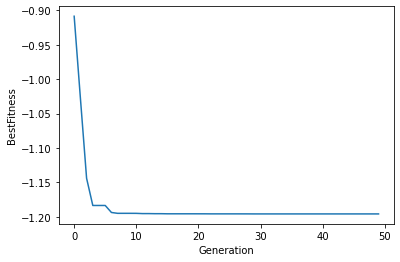

precondition : 
E_cell=0.60 
N2 accumulation= 0 

best_x= [0.91 1.61 10.00 100.00 6.00 358.00]
best_fitness=-2.25
best crossover coefficient=5.57e-15
best  current density=2.29
Time cost of grid search= 157.059517s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.233, and improve the current density 119.743 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.165, and improve the current density 0.971 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.423, and the current density decreased by 0.007 

bestfitness plot


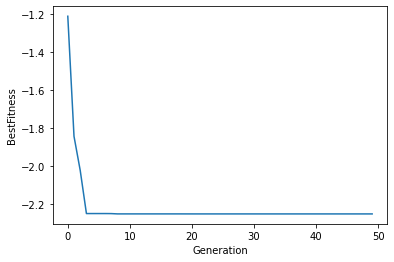

precondition : 
E_cell=0.50 
N2 accumulation= 0 

best_x= [1.00 1.75 10.00 100.00 5.58 358.00]
best_fitness=-3.04
best crossover coefficient=5.62e-15
best  current density=2.30
Time cost of grid search= 156.726677s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.226, and improve the current density 120.528 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.175, and improve the current density 0.983 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.445, and the current density decreased by 0.000 

bestfitness plot


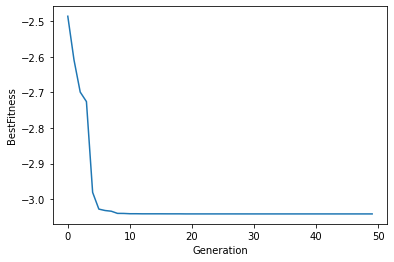

precondition : 
E_cell=0.40 
N2 accumulation= 0 

best_x= [1.00 1.85 10.00 100.00 5.16 358.00]
best_fitness=-3.65
best crossover coefficient=5.66e-15
best  current density=2.29
Time cost of grid search= 156.435234s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.221, and improve the current density 119.960 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.184, and improve the current density 0.974 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.463, and the current density decreased by 0.005 

bestfitness plot


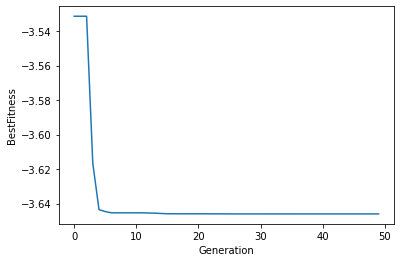

precondition : 
E_cell=0.30 
N2 accumulation= 0 

best_x= [0.21 1.22 10.00 100.00 2.25 358.00]
best_fitness=-4.15
best crossover coefficient=5.72e-15
best  current density=2.15
Time cost of grid search= 157.134332s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.214, and improve the current density 112.274 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.195, and improve the current density 0.849 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.486, and the current density decreased by 0.068 

bestfitness plot


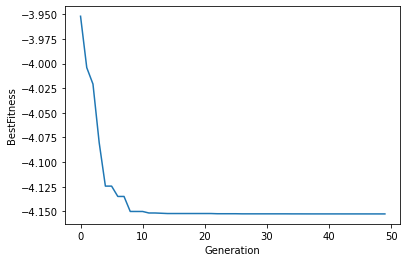

precondition : 
E_cell=0.20 
N2 accumulation= 0 

best_x= [0.04 1.37 10.00 100.00 2.10 358.00]
best_fitness=-4.66
best crossover coefficient=5.69e-15
best  current density=2.12
Time cost of grid search= 158.066864s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.217, and improve the current density 110.730 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.189, and improve the current density 0.823 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.474, and the current density decreased by 0.081 

bestfitness plot


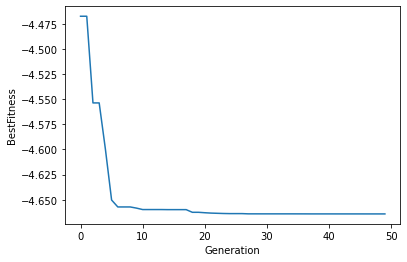

In [216]:
# only current density optmization in all cell voltage

for i in range(8):
    xN2a_in0=0
    iter_num = 50
    E_cell=0.9-0.1*i
    print('precondition : ')
    print('E_cell={:.2f}'.format(E_cell),'\nN2 accumulation=',xN2a_in0,'\n')

    ##optimization
    pso = PSO(func=funci, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
    pso.record_mode = True
    time_start = time.time()
    a= pso.run()

    print('best_x=', a.gbest_x)
    print('best_fitness={:.2f}'.format(a.gbest_y))
    E_cell=0.5
    best_y=func(a.gbest_x)
    best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
    print('best crossover coefficient={:.2e}'.format(best_y[1]))
    print('best  current density={:.2f}'.format(best_y[0]))
    time_end = time.time()
    print('Time cost of grid search= %fs' % (time_end - time_start),'\n')

    evacuate(a.gbest_x)
    # visualization 
    print('bestfitness plot')
    plt.plot(pso.gbest_y_hist)
    plt.xlabel('Generation')
    plt.ylabel('BestFitness')
    plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
    plt.show()




precondition : 
N2 accumulation= 0 

best_x= [1.00 1.89 10.00 100.00 6.00 358.00]
best_fitness=-2.46
best crossover coefficient=5.58e-15
best  current density=2.30
Time cost of grid search= 1252.798792s 

compared with the worst crossover coefficient 7.25e-15 and worst current density 0.033 in E_cell=0.5 ,we decrease the crossover by 0.231, and improve the current density 69.527 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.168 in E_cell=0.5 ,we decrease the crossover by -0.168, and improve the current density 0.968 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.426, and the current density decreased by 0.002 

bestfitness plot


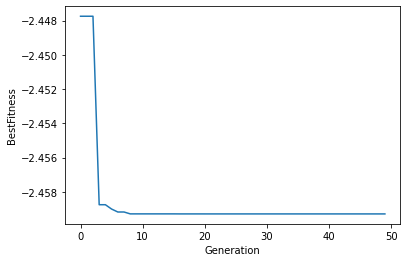

In [13]:
# weightedd current density optimization

xN2a_in0=0
iter_num = 50
print('precondition : ')
print('N2 accumulation=',xN2a_in0,'\n')

##optimization
pso = PSO(func=funci_e, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
time_start = time.time()
a= pso.run()

print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(a.gbest_y))
E_cell=0.5
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
print('best  current density={:.2f}'.format(best_y[0]))
time_end = time.time()
print('Time cost of grid search= %fs' % (time_end - time_start),'\n')


evacuate(a.gbest_x)
# visualization 
print('bestfitness plot')
plt.plot(pso.gbest_y_hist)
plt.xlabel('Generation')
plt.ylabel('BestFitness')
plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
plt.show()


In [ ]:
######################### consider both crossover and performance ##########################

In [14]:
## condsider both , func defininig

## func func_e defined before

## with Ecell&power
def func_ep55(X):
    return func_e(X)[1]-func_e(X)[0]
def func_ep64(X):
    return func_e(X)[1]*0.6-func_e(X)[0]*0.4  
def func_ep73(X):
    return func_e(X)[1]*0.7-func_e(X)[0]*0.3
def func_ep91(X):
    return func_e(X)[1]*0.9-func_e(X)[0]*0.1
def func_ep955(X):
    return func_e(X)[1]*0.95-func_e(X)[0]*0.05
def func_ep982(X):
    return func_e(X)[1]*0.98-func_e(X)[0]*0.02
def func_ep37(X):
    return func_e(X)[1]*0.3-func_e(X)[0]*0.7
def func_ep46(X):
    return func_e(X)[1]*0.4-func_e(X)[0]*0.6
##anti opt

def antifunc_ep55(X):
    return -(func_e(X)[1]-func_e(X)[0])
def antifunc_ep64(X):
    return -(func_e(X)[1]*0.6-func_e(X)[0]*0.4)  
def antifunc_ep73(X):
    return -(func_e(X)[1]*0.7-func_e(X)[0]*0.3)
def antifunc_ep91(X):
    return -(func_e(X)[1]*0.9-func_e(X)[0]*0.1)
def antifunc_ep955(X):
    return -(func_e(X)[1]*0.95-func_e(X)[0]*0.05)
def antifunc_ep982(X):
    return -(func_e(X)[1]*0.98-func_e(X)[0]*0.02)

precondition : 
N2 accumulation= 0 

best_x= [0.92 1.83 10.00 100.00 6.00 358.00]
best_fitness=-1.40
best crossover coefficient=5.56e-15
best  current density=2.30
Time cost of grid search= 2512.112677s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.235, and improve the current density 120.228 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by -0.162, and improve the current density 0.978 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 1.418, and the current density decreased by 0.003 

bestfitness plot


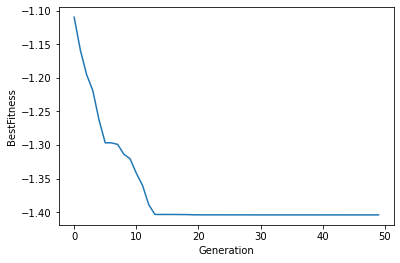

In [231]:
# consider both ,ep37
xN2a_in0=0
iter_num = 50

print('precondition : ')
print('N2 accumulation=',xN2a_in0,'\n')

##optimization
pso = PSO(func=func_ep37, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
time_start = time.time()
a= pso.run()

print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(a.gbest_y))
E_cell=0.5
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
print('best  current density={:.2f}'.format(best_y[0]))
time_end = time.time()
print('Time cost of grid search= %fs' % (time_end - time_start),'\n')


evacuate(a.gbest_x)
# visualization 
print('bestfitness plot')
plt.plot(pso.gbest_y_hist)
plt.xlabel('Generation')
plt.ylabel('BestFitness')
plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
plt.show()




precondition : 
N2 accumulation= 0 

best_x= [0.00 3.00 10.00 100.00 4.28 323.00]
best_fitness=-1.52
best crossover coefficient=2.32e-15
best  current density=1.28
Time cost of grid search= 2510.113340s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.681, and improve the current density 66.610 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.515, and improve the current density 0.103 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.010, and the current density decreased by 0.444 

bestfitness plot


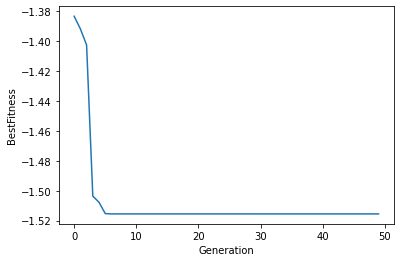

In [218]:
# consider both ,ep73
xN2a_in0=0
iter_num = 50

print('precondition : ')
print('N2 accumulation=',xN2a_in0,'\n')

##optimization
pso = PSO(func=func_ep73, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
time_start = time.time()
a= pso.run()

print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(a.gbest_y))
E_cell=0.5
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
print('best  current density={:.2f}'.format(best_y[0]))
time_end = time.time()
print('Time cost of grid search= %fs' % (time_end - time_start),'\n')


evacuate(a.gbest_x)
# visualization 
print('bestfitness plot')
plt.plot(pso.gbest_y_hist)
plt.xlabel('Generation')
plt.ylabel('BestFitness')
plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
plt.show()




precondition : 
N2 accumulation= 0 

best_x= [1.00 2.32 10.00 100.00 3.70 323.00]
best_fitness=-2.73
best crossover coefficient=2.41e-15
best  current density=1.39
Time cost of grid search= 2509.894386s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.668, and improve the current density 72.508 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.495, and improve the current density 0.200 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.050, and the current density decreased by 0.395 

bestfitness plot


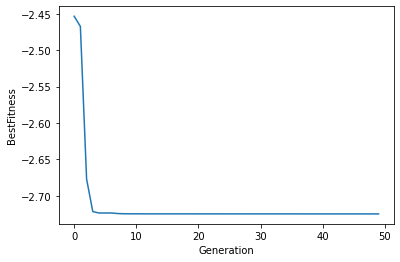

In [219]:
# consider both ,ep55
xN2a_in0=0
iter_num = 50

print('precondition : ')
print('N2 accumulation=',xN2a_in0,'\n')

##optimization
pso = PSO(func=func_ep55, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
time_start = time.time()
a= pso.run()

print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(a.gbest_y))
E_cell=0.5
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
print('best  current density={:.2f}'.format(best_y[0]))
time_end = time.time()
print('Time cost of grid search= %fs' % (time_end - time_start),'\n')


evacuate(a.gbest_x)
# visualization 
print('bestfitness plot')
plt.plot(pso.gbest_y_hist)
plt.xlabel('Generation')
plt.ylabel('BestFitness')
plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
plt.show()




precondition : 
N2 accumulation= 0 

best_x= [1.00 3.00 20.00 150.00 2.90 323.00]
best_fitness=-1.04
best crossover coefficient=2.48e-15
best  current density=1.18
Time cost of grid search= 2479.898392s 

compared with the worst crossover coefficient 7.25e-15 and worst current density 0.033 in E_cell=0.5 ,we decrease the crossover by 0.658, and improve the current density 35.240 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.168 in E_cell=0.5 ,we decrease the crossover by 0.480, and improve the current density 0.011 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.080, and the current density decreased by 0.487 

bestfitness plot


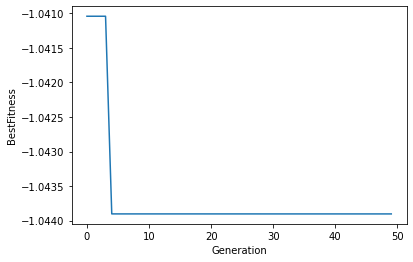

In [15]:
# consider both ,ep46
xN2a_in0=0
iter_num = 50

print('precondition : ')
print('N2 accumulation=',xN2a_in0,'\n')

##optimization
pso = PSO(func=func_ep46, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,20,150,0.5,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
time_start = time.time()
a= pso.run()

print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(a.gbest_y))
E_cell=0.5
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
print('best  current density={:.2f}'.format(best_y[0]))
time_end = time.time()
print('Time cost of grid search= %fs' % (time_end - time_start),'\n')


evacuate(a.gbest_x)
# visualization 
print('bestfitness plot')
plt.plot(pso.gbest_y_hist)
plt.xlabel('Generation')
plt.ylabel('BestFitness')
plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
plt.show()




precondition : 
N2 accumulation= 0 

best_x= [0.00 3.00 10.00 100.00 6.00 323.00]
best_fitness=-1.72
best crossover coefficient=2.30e-15
best  current density=1.23
Time cost of grid search= 2516.280176s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.684, and improve the current density 63.885 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.519, and improve the current density 0.059 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by 0.000, and the current density decreased by 0.466 

bestfitness plot


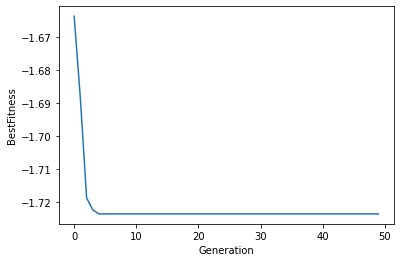

In [220]:
# consider both ,ep91
xN2a_in0=0
iter_num = 50

print('precondition : ')
print('N2 accumulation=',xN2a_in0,'\n')

##optimization
pso = PSO(func=func_ep91, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
time_start = time.time()
a= pso.run()

print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(a.gbest_y))
E_cell=0.5
best_y=func(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
print('best  current density={:.2f}'.format(best_y[0]))
time_end = time.time()
print('Time cost of grid search= %fs' % (time_end - time_start),'\n')


evacuate(a.gbest_x)
# visualization 
print('bestfitness plot')
plt.plot(pso.gbest_y_hist)
plt.xlabel('Generation')
plt.ylabel('BestFitness')
plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
plt.show()




precondition : 
N2 accumulation= 0 

best_x= [1.00 3.00 10.00 100.00 6.00 323.00]
best_fitness=-1.78
best crossover coefficient=2.53e-15
best  current density=1.14
Time cost of grid search= 2518.078773s 

compared with the worst crossover coefficient 7.27e-15 and worst current density 0.019 in E_cell=0.5 ,we decrease the crossover by 0.735, and improve the current density 93.488 

compared with the middle crossover coefficient 4.78e-15 and mid current density 1.161 in E_cell=0.5 ,we decrease the crossover by 0.597, and improve the current density 0.542 

compared with the best crossover coefficient 2.30e-15 and best current density 2.303 in E_cell=0.5 ,the crossover coefficient increased by -0.162, and the current density decreased by 0.223 

bestfitness plot


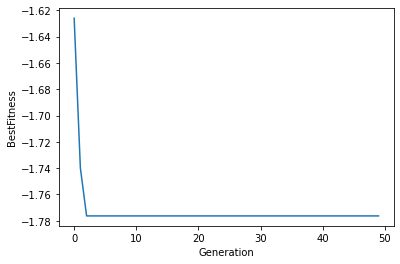

In [221]:
# consider both ,ep955
xN2a_in0=0
iter_num = 50

print('precondition : ')
print('N2 accumulation=',xN2a_in0,'\n')


##optimization
pso = PSO(func=func_ep955, dim=6, pop=50, max_iter=iter_num, lb=[0,0.5,10,100,1,323], ub=[1,3,500,500,6,358]
      ,w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
time_start = time.time()
a= pso.run()

print('best_x=', a.gbest_x)
print('best_fitness={:.2f}'.format(a.gbest_y))
E_cell=0.5
best_y=func_e(a.gbest_x)
best_y=best_y*np.std(raw_output_global,axis=0).T.values+np.mean(raw_output_global,axis=0).T.values
print('best crossover coefficient={:.2e}'.format(best_y[1]))
print('best  current density={:.2f}'.format(best_y[0]))
time_end = time.time()
print('Time cost of grid search= %fs' % (time_end - time_start),'\n')


evacuate(a.gbest_x)
# visualization 
print('bestfitness plot')
plt.plot(pso.gbest_y_hist)
plt.xlabel('Generation')
plt.ylabel('BestFitness')
plt.savefig('crossover PSO OPT{}.png'.format(E_cell))
plt.show()


